In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

In [39]:
#Lectura de datos 
data = pd.read_csv('DEPURACION_FINAL.csv', sep=',')
data

,AÑO,MES,DIA,FECHA,HORA,KW-H
0,2015,1,jueves,1,0,3200
1,2015,1,jueves,1,1,3200
2,2015,1,jueves,1,2,2400
3,2015,1,jueves,1,3,2400
4,2015,1,jueves,1,4,2400
...,...,...,...,...,...,...
43819,2019,12,martes,31,19,3400
43820,2019,12,martes,31,20,3600
43821,2019,12,martes,31,21,3800
43822,2019,12,martes,31,22,4000


In [40]:
#Verificacion de nans 
data.isnull().values.any()
data.isnull().sum().sum()

data.isnull().sum()

AÑO      0
MES      0
DIA      0
FECHA    0
HORA     0
KW-H     0
dtype: int64

In [41]:
#Variable categrica DIA a numérica
#TODO Borrar al final de cuentas no se usa este dato 
data['DIA'] = data['DIA'].map({'lunes': 1 ,
                                           'martes': 2,
                                           'miercoles': 3,
                                           'miércoles': 3,
                                           'jueves': 4 , 
                                           'viernes': 5, 
                                           'sábado': 6,
                                           'sabado': 6,  #inconsistencia en la data por las tildes
                                           'domingo': 7})




In [42]:
data.tail(50)
# data.to_csv('data_total.csv')


,AÑO,MES,DIA,FECHA,HORA,KW-H
43774,2019,12,7,29,22,3200
43775,2019,12,7,29,23,2800
43776,2019,12,1,30,0,2400
43777,2019,12,1,30,1,2400
43778,2019,12,1,30,2,2000
43779,2019,12,1,30,3,2000
43780,2019,12,1,30,4,2000
43781,2019,12,1,30,5,2000
43782,2019,12,1,30,6,2000
43783,2019,12,1,30,7,1800


In [43]:
#Llevamos la hora y la fecha para los indices porque lo que nos interesa es KW-H
from datetime import datetime 
data_final = pd.DataFrame()
fechas_dt = []
kwh_dt = []
for registro in data.values:
    fecha = "{}-{}-{} {}".format(registro[0], registro[1], registro[3], registro[4])
    fecha_dt = datetime.strptime(fecha, '%Y-%m-%d %H')
    fechas_dt.append(fecha_dt)
    kwh_dt.append(registro[5])
#Creamos un nuevo dataframe con el formato de fecha correcto y el valor de KW-H
data_final['FECHA'] = fechas_dt
data_final['KW-H'] = kwh_dt
data_final

,FECHA,KW-H
0,2015-01-01 00:00:00,3200
1,2015-01-01 01:00:00,3200
2,2015-01-01 02:00:00,2400
3,2015-01-01 03:00:00,2400
4,2015-01-01 04:00:00,2400
...,...,...
43819,2019-12-31 19:00:00,3400
43820,2019-12-31 20:00:00,3600
43821,2019-12-31 21:00:00,3800
43822,2019-12-31 22:00:00,4000


In [44]:
# data_final.to_csv('data_total_dattime.csv')

In [45]:
#Llevamos la FECHA al indice de nuestro df, ahora solo tenemos una columna de datos
data_final.set_index('FECHA', drop=True, inplace = True)
data_final

,KW-H
FECHA,
2015-01-01 00:00:00,3200
2015-01-01 01:00:00,3200
2015-01-01 02:00:00,2400
2015-01-01 03:00:00,2400
2015-01-01 04:00:00,2400
...,...
2019-12-31 19:00:00,3400
2019-12-31 20:00:00,3600
2019-12-31 21:00:00,3800


In [46]:
#Dividir los datos de entrenamiento y de test
# No se puede utilizar train test split, debemos dividir en el ultimo segmento 
#Tomamos los datos para validacion el 18%, pero del final de los datos (todo 2019 menos enero)
size = int(0.18292*data_final.shape[0])
data_test = data_final[-size:]
data_train = data_final[:-size]
data_train


,KW-H
FECHA,
2015-01-01 00:00:00,3200
2015-01-01 01:00:00,3200
2015-01-01 02:00:00,2400
2015-01-01 03:00:00,2400
2015-01-01 04:00:00,2400
...,...
2019-01-31 19:00:00,3300
2019-01-31 20:00:00,3300
2019-01-31 21:00:00,3400


In [47]:
#Transformacion de datos a numerica

data_train['KW-H'] = [valor.replace(",", ".") for valor in data_train['KW-H'] ]
data_train['KW-H'] = [float(valor) for valor in data_train['KW-H'] ]

data_test['KW-H'] = [valor.replace(",", ".") for valor in data_test['KW-H'] ]
data_test['KW-H'] = [float(valor) for valor in data_test['KW-H'] ]

data_train

/Users/javiererazo/opt/anaconda3/envs/powerdemand/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/javiererazo/opt/anaconda3/envs/powerdemand/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/javiererazo/opt/anaconda3/envs/powerdemand/lib/python3.7/site-packages/ipykernel_launcher

,KW-H
FECHA,
2015-01-01 00:00:00,3200.0
2015-01-01 01:00:00,3200.0
2015-01-01 02:00:00,2400.0
2015-01-01 03:00:00,2400.0
2015-01-01 04:00:00,2400.0
...,...
2019-01-31 19:00:00,3300.0
2019-01-31 20:00:00,3300.0
2019-01-31 21:00:00,3400.0


In [48]:
#Normalizacion de los datos
#Para LSTM es obligatoria la normalización, en este caso lo hacemos de 0 a 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
data_train_scaled = sc.fit_transform(data_train)
print(data_train_scaled.shape)
data_train_scaled
 


(35808, 1)


array([[0.66666667],
       [0.66666667],
       [0.5       ],
       ...,
       [0.70833333],
       [0.75      ],
       [0.54166667]])

In [49]:
#Tenemos que entrenar la red por bloques de datos 
#Time_step es el tamaño del bloque 
#Cada n datos genera una salida 
#Tomamos bloques de 60 datos consecutivos 
time_step = 60 
X_train = [] #Lista de conjuntos de 60 datos 
Y_train = []
m = len(data_train_scaled)
for i in range(time_step, m):
    X_train.append(data_train_scaled[i-time_step:i, 0]) #Guardamos 60 valores
    Y_train.append(data_train_scaled[i, 0]) #Buscamos predecir el dato time_step + 1, no la var KW
X_train, Y_train = np.array(X_train), np.array(Y_train) #Usamos np por reshape y optimizacion



In [50]:
X_train.shape, Y_train.shape

((35748, 60), (35748,))

In [15]:
# pd.DataFrame(X_train).to_csv('x_train.csv')
# pd.DataFrame(Y_train).to_csv('y_train.csv')

In [51]:
#Obligatorio el reshape de los datos, es obligatorio por Keras, nos pide ingresar un array de 3 dim
#Llevamos de dos a 3 dimensiones nuestro arreglo 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #Agregamos una nueva dimension
X_train.shape, Y_train.shape

((35748, 60, 1), (35748,))

# Modelo y entrenamiento

In [17]:
#MODELO
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error


In [ ]:
def NN_LSTM(optimizador, neuronas, epocas):
    dim_entrada = (X_train.shape[1],X_train.shape[2])
    dim_salida = 1 
    num_neuronas = neuronas

    model = Sequential()
    #Primera capa LSTM con 1 neurona (Capa de entrada)
    #Segunda capa LSTM con num_neuronas (Capa oculta)
    model.add(LSTM(units=num_neuronas, return_sequences = True, input_shape=dim_entrada))
    #Esto no es una capa de neuronas, solo es una capa de congelamiento de neuronas 
    #congela el 40% de las neuronas para evitar overfitting
    model.add(Dropout(0.4))
    # Tercera capa LSTM con num_neuronas (Capa oculta)
    model.add(LSTM(units=num_neuronas))
    # model.add(Dropout(0.2))
    #Cuarta y última capa (no es LSTM) tiene una sola neurona de salida
    model.add(Dense(units = dim_salida))
    model.compile(optimizer= optimizador, loss='mse', metrics = ['mean_absolute_error']) #mean_squared_error

    #Entrenamiento 
    history = model.fit(X_train, Y_train, epochs = epocas, batch_size = 64)
    return model, history

def predDataTest(modelo):
    x_test  = data_test.values
    x_test = sc.transform(x_test)
    # # x_test
    X_test = []
    for i in range(time_step, len(x_test)):
        X_test.append(x_test[i-time_step: i, 0])
    X_test= np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    X_test.shape
    prediccion = modelo.predict(X_test)
    prediccion = sc.inverse_transform(prediccion)
    return prediccion

In [19]:
#rmsprop LOS MEJORES RESULTADOS
model, history = NN_LSTM(optimizador = 'rmsprop', neuronas = 10, epocas = 10)
#Guardamos el modelo para no tener que entrenar otra vez para probar
model.save('modelos/model.h5')

2022-01-23 00:54:50.298835: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-23 00:54:50.299985: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/10
35748/35748 [==============================] - 129s 4ms/step - loss: 0.0236 - mean_absolute_error: 0.0933
Epoch 2/10
35748/35748 [==============================] - 142s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0520
Epoch 3/10
35748/35748 [==============================] - 157s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0428
Epoch 4/10
35748/35748 [==============================] - 140s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0391
Epoch 5/10
35748/35748 [==============================] - 169s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0376
Epoch 6/10
35748/35748 [==============================] - 145s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0368
Epoch 7/10
35748/35748 [==============================] - 156s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0362
Epoch 8/10
35748/35748 [==============================] - 162s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0358
Epoch 9/10
35748/35748 [==============================] - 156s 4

In [69]:
#Ver la arquitectura del modelo 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 10)            480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 10)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 240       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 725
Trainable params: 725
Non-trainable params: 0
_________________________________________________________________


In [53]:
model = keras.models.load_model('modelos/model.h5')

prediccion = predDataTest(model) ##Arreglar porque salta error al correr de nuevo

In [54]:
x_test  = data_test.values
x_test = sc.transform(x_test)
# # x_test
X_test = []
for i in range(time_step, len(x_test)):
    X_test.append(x_test[i-time_step: i, 0])
X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape
prediccion = model.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

In [55]:
len(prediccion)

7956

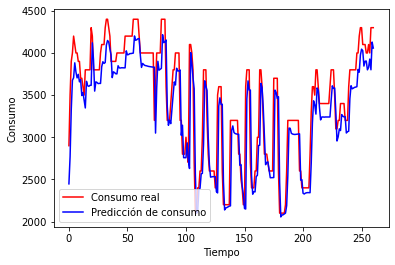

In [56]:
#Grafica de valores
# Y_test #Aun no defnido 
plt.plot(data_test.values[60:321], color='red', label='Consumo real')
plt.plot(prediccion[:261], color='blue', label='Predicción de consumo')
plt.xlabel('Tiempo')
plt.ylabel('Consumo')
plt.legend()
plt.show()

# Ajuste de valores de predicción y test

In [57]:
#Union de datos 
#LSTM nos predice el dato time_step + 1 por tanto debemos unir a partir del dato 61 de nuestro data_test
data_test_slic  = data_test[60:].copy()
data_test_pred = pd.concat([data_test_slic, 
                  pd.DataFrame(prediccion, 
                               columns=['KW-H_PRED'], 
                               index = data_test_slic.index)], 
                 axis =1)
# print(data_test_slic.shape)
# print(prediccion.shape)
# print(data_test_slic)
# print(prediccion)
data_test_pred.head(20)


,KW-H,KW-H_PRED
FECHA,,
2019-02-03 12:00:00,2900.0,2447.286377
2019-02-03 13:00:00,3500.0,2769.744385
2019-02-03 14:00:00,3900.0,3327.097900
2019-02-03 15:00:00,4000.0,3675.702637
2019-02-03 16:00:00,4200.0,3706.161865
2019-02-03 17:00:00,4100.0,3882.923096
2019-02-03 18:00:00,4000.0,3773.962891
2019-02-03 19:00:00,4000.0,3704.181885
2019-02-03 20:00:00,3900.0,3746.572754


# Gráficos estadísticos 

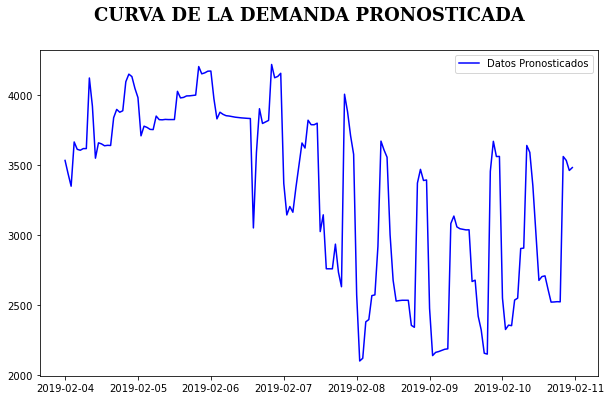

In [58]:
# Figura 5.8: Curva de la demanda eléctrica pronosticada
#Los primeros 7 dias(completos) de la prediccion (4 de febrero)
semana_estudio_test_pred = data_test_pred[
    data_test_pred.index.get_loc('2019-02-04 00:00:00'):
    data_test_pred.index.get_loc('2019-02-11 00:00:00')]

semana_estudio_test = semana_estudio_test_pred['KW-H']
semana_estudio_pred = semana_estudio_test_pred['KW-H_PRED']
# semana_estudio_pred
plt.figure(figsize=(10,6))
plt.plot(semana_estudio_pred, 
           color='blue', 
           label='Datos Pronosticados')
plt.suptitle('CURVA DE LA DEMANDA PRONOSTICADA',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()
plt.show()


In [26]:
# Tabla 5.2: Análisis descriptiva con datos reales de la demanda eléctrica
data_pred_febr = semana_estudio_pred
maximo = np.max(data_pred_febr)
print('Máximo = {}'.format(maximo))
minimo = np.min(data_pred_febr)
print('Mínimo = {}'.format(minimo))
# q75, q25 = np.percentile(data_estudio['KW-H'], [75, 25])
# rango = q75 - q25
rango = maximo - minimo
print('Rango = {}'.format(rango))
media = np.mean(data_pred_febr)
print('Media = {}'.format(media))
mediana = data_pred_febr.median()
print('Mediana = {}'.format(mediana))
varianza = data_pred_febr.var()
print('Varianza = {}'.format(varianza))
std = np.std(data_pred_febr)
print('Desviación Estándar = {}'.format(std))
coef_var = np.std(data_pred_febr) /np.mean(data_pred_febr) * 100
print('Coeficiente de variación = {} %'.format(coef_var))
# lim_max, lim_min = np.percentile((data_pred_febr), [75, 25])
lim_max = media + 1 * std
lim_min = media - 1 * std
print('Límite máximo = {}'.format(lim_max))
print('Límite mínimo = {}'.format(lim_min))

data_pred_febr.describe()

Máximo = 4216.93896484375
Mínimo = 2099.4912109375
Rango = 2117.44775390625
Media = 3325.902587890625
Mediana = 3559.52294921875
Varianza = 386201.0625
Desviación Estándar = 619.5984497070312
Coeficiente de variación = 18.629482774478877 %
Límite máximo = 3945.5010375976562
Límite mínimo = 2706.3041381835938


count     168.000000
mean     3325.902588
std       621.450745
min      2099.491211
25%      2705.967407
50%      3559.523071
75%      3831.250488
max      4216.938965
Name: KW-H_PRED, dtype: float64

In [27]:
#Funciones
def funcionConstante(x, constante):
    return constante

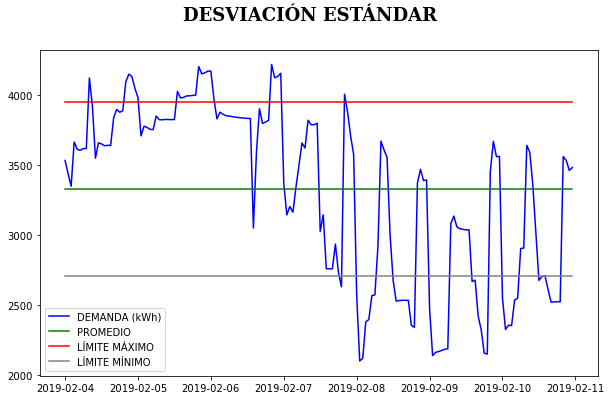

In [28]:
# Figura 5.9: Desviación estándar con datos de la demanda pronosticada

datos_kwh = semana_estudio_pred

plt.figure(figsize=(10,6))
plt.plot(datos_kwh.index,
         datos_kwh, 
         color = 'blue', 
         label = 'DEMANDA (kWh)')
plt.plot(datos_kwh.index,
         [funcionConstante(x, media) for x in datos_kwh], 
         color = 'green', 
         label = 'PROMEDIO')

plt.plot(datos_kwh.index,
           [funcionConstante(x, lim_max) for x in datos_kwh], 
           color = 'red', 
           label = 'LÍMITE MÁXIMO')

plt.plot(datos_kwh.index,
           [funcionConstante(x, lim_min) for x in datos_kwh], 
           color = 'gray', 
           label = 'LÍMITE MÍNIMO')


plt.suptitle('DESVIACIÓN ESTÁNDAR',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()

In [276]:
# Figura 5.10: Capacidades del proceso para la demanda de energía eléctrica (datos pronosticados - 1 semana)
#Exportacion de datos para sixpack capability system
semana_estudio_pred.to_csv('capabilities/prediccion_febrero.csv')
semana_estudio_pred

FECHA
2019-02-04 00:00:00    3655.280029
2019-02-04 01:00:00    3566.523682
2019-02-04 02:00:00    3470.608154
2019-02-04 03:00:00    3785.480225
2019-02-04 04:00:00    3741.437012
                          ...     
2019-02-10 19:00:00    2598.151855
2019-02-10 20:00:00    3653.235596
2019-02-10 21:00:00    3625.114746
2019-02-10 22:00:00    3529.561523
2019-02-10 23:00:00    3573.510010
Name: KW-H_PRED, Length: 168, dtype: float32

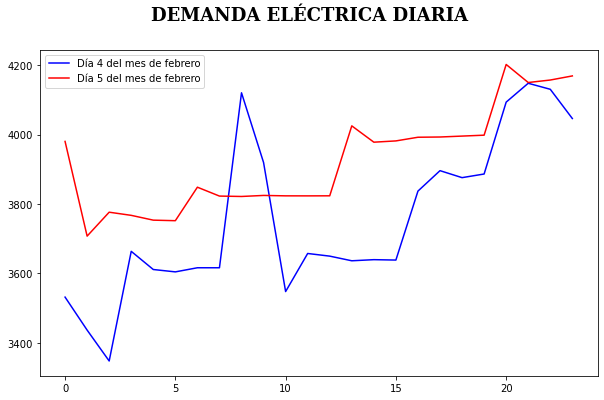

In [29]:
# Figura 5.11: Demanda eléctrica diaria con datos obtenidos del pronostico
# KW-H vs Hora del dia 

cuatro_feb_pred = semana_estudio_pred[
    semana_estudio_pred.index.get_loc('2019-02-04 00:00:00'):
    semana_estudio_pred.index.get_loc('2019-02-05 00:00:00')]
cinco_feb_pred = semana_estudio_pred[
    semana_estudio_pred.index.get_loc('2019-02-05 00:00:00'):
    semana_estudio_pred.index.get_loc('2019-02-06 00:00:00')]

serie = range(0,24)
plt.figure(figsize=(10,6))
plt.plot(serie,
         cuatro_feb_pred,
         color = 'blue', 
         label = 'Día 4 del mes de febrero')

plt.plot(serie, 
            cinco_feb_pred, 
            color = 'red', 
            label = 'Día 5 del mes de febrero')

plt.suptitle('DEMANDA ELÉCTRICA DIARIA',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()


In [290]:
# Figura 5.12: Capacidades del proceso para la demanda de energía eléctrica (datos pronosticados - 1 día)
# exportamos los datos del dia 3 del mes de febrero 
cinco_feb_pred.to_csv('capabilities/datos_cincoFeb_pred.csv')
cinco_feb_pred

FECHA
2019-02-05 00:00:00    4094.496094
2019-02-05 01:00:00    3833.658691
2019-02-05 02:00:00    3897.063965
2019-02-05 03:00:00    3901.343750
2019-02-05 04:00:00    3883.603516
2019-02-05 05:00:00    3882.759521
2019-02-05 06:00:00    3976.286377
2019-02-05 07:00:00    3953.080078
2019-02-05 08:00:00    3946.276367
2019-02-05 09:00:00    3949.774414
2019-02-05 10:00:00    3947.625244
2019-02-05 11:00:00    3946.518555
2019-02-05 12:00:00    3946.565186
2019-02-05 13:00:00    4138.872070
2019-02-05 14:00:00    4101.571289
2019-02-05 15:00:00    4096.158691
2019-02-05 16:00:00    4109.429688
2019-02-05 17:00:00    4110.395996
2019-02-05 18:00:00    4112.699219
2019-02-05 19:00:00    4116.383789
2019-02-05 20:00:00    4307.884766
2019-02-05 21:00:00    4268.145996
2019-02-05 22:00:00    4265.415039
2019-02-05 23:00:00    4279.197266
Name: KW-H_PRED, dtype: float32

In [291]:
cinco_feb_pred.describe()

count      24.000000
mean     4044.383789
std       141.101822
min      3833.658691
25%      3946.458008
50%      4035.391235
75%      4113.620361
max      4307.884766
Name: KW-H_PRED, dtype: float64

In [31]:
# mes = 1
# fecha_inicio = 25
# fecha_fin = 31
# year = 2019
# data_cuar_sem_dic = data[(data['FECHA'] >=fecha_inicio) &  
#                          (data['MES'] == mes )& 
#                          (data['AÑO'] == year)]
# data
# data_cuar_sem_dic['KW-H']
# data_pred_febr

0      2505.201172
1      2842.103760
2      3419.429932
3      3757.582520
4      3787.280273
          ...     
163    2987.989990
164    3723.897705
165    3683.575684
166    3426.270996
167    3088.732422
Name: KW-H PRED, Length: 168, dtype: float32

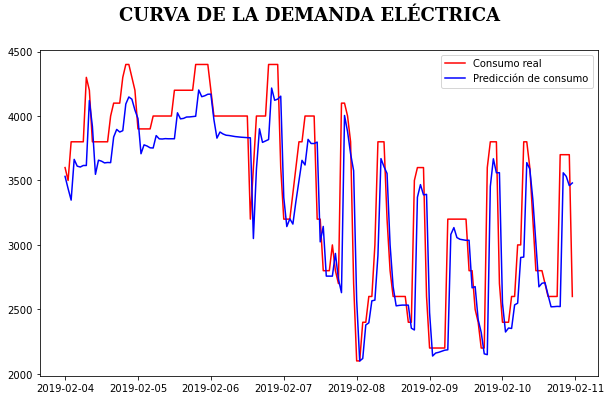

In [30]:
# Figura 5.13: Curva de la demanda eléctrica real vs pronosticada
#Pronostico para los dias en estudio
plt.figure(figsize=(10,6))
plt.plot(semana_estudio_test, 
         color='red', 
         label='Consumo real')
plt.plot(semana_estudio_pred, 
         color='blue', 
         label='Predicción de consumo')
plt.suptitle('CURVA DE LA DEMANDA ELÉCTRICA',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()
plt.show()

240.34125046502976


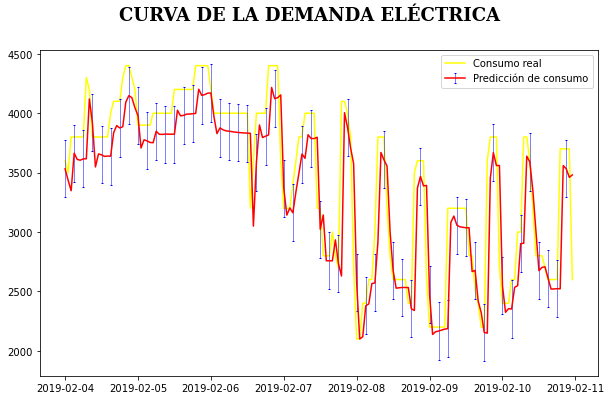

In [31]:
#Figura 5.14: Gráfica de error entre curva de la demanda eléctrica real y pronosticada (semanal)

# EROR_PROM = 0.033

x = semana_estudio_test.index
y = semana_estudio_test

x_pred = x
y_pred = semana_estudio_pred

me =  (abs(y- y_pred)).mean(axis=0) #Error medio de la semana
print(me)
yerror = me
plt.figure(figsize=(10,6))
plt.plot(semana_estudio_test.index, 
         semana_estudio_test,
         color='yellow', 
         label='Consumo real')
plt.errorbar(x_pred,
         y_pred,
         yerr = yerror,
         ecolor = 'blue', 
         elinewidth = 0.5,
         capsize = 1,
         errorevery = 3,
         color='red', 
         label='Predicción de consumo')
plt.suptitle('CURVA DE LA DEMANDA ELÉCTRICA',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()
plt.show()

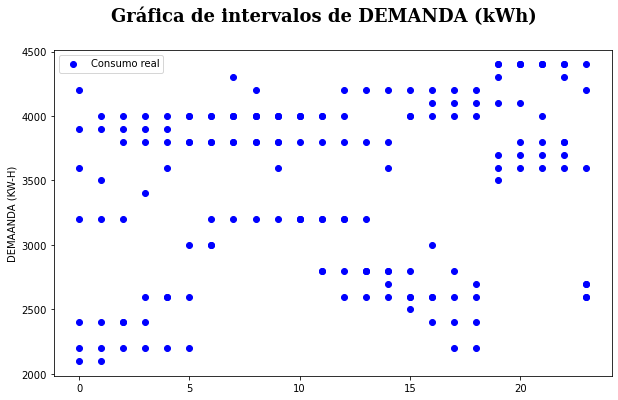

In [32]:
# Figura 5.15: Intervalos de la demanda de energía eléctrica (Datos reales y de pronóstico – 1 semana)
data_pred_test_hora = semana_estudio_test_pred.copy()
hora_temp = np.arange(0, 24)
hora = []
for _ in range(7):
    hora = np.concatenate([hora, hora_temp])
hora.shape

data_pred_test_hora = pd.concat([data_pred_test_hora, 
                  pd.DataFrame(hora, 
                               columns=['HORA'], 
                               index = data_pred_test_hora.index)], 
                 axis =1)
data_pred_test_hora_sort = data_pred_test_hora.sort_values('HORA')
data_pred_test_hora_sort.reset_index()
data_pred_test_hora_sort.index

# plt.subplot(1,2,1)
plt.figure(figsize=(10,6))
plt.scatter(data_pred_test_hora_sort['HORA'],
               data_pred_test_hora_sort['KW-H'], 
               color='blue', 
               label='Consumo real')

plt.suptitle('Gráfica de intervalos de DEMANDA (kWh)',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.ylabel('DEMAANDA (KW-H)')
plt.legend()
plt.show()


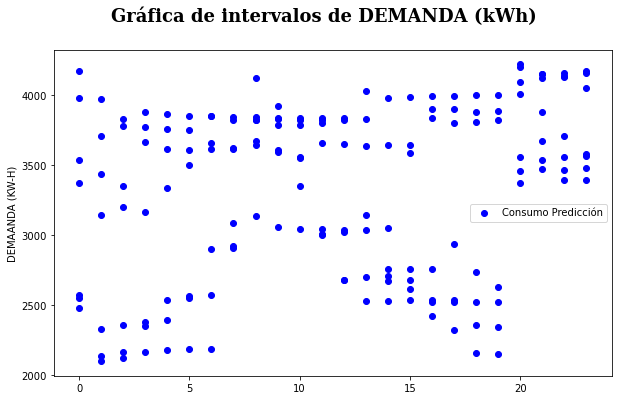

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(data_pred_test_hora_sort['HORA'],
               data_pred_test_hora_sort['KW-H_PRED'], 
               color='blue', 
               label='Consumo Predicción')

plt.suptitle('Gráfica de intervalos de DEMANDA (kWh)',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.ylabel('DEMAANDA (KW-H)')
plt.legend()
plt.show()

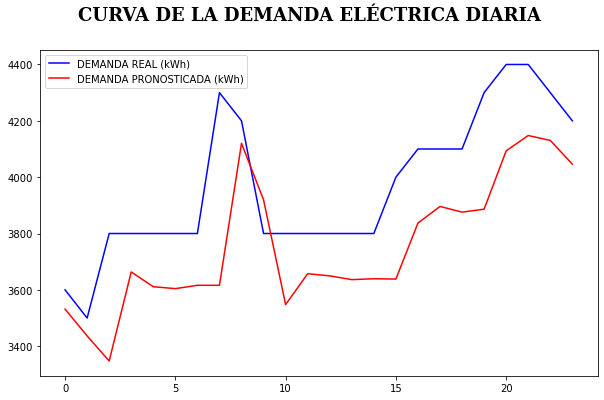

In [34]:
# Figura 5.16: Curva demanda eléctrica real vs pronosticada (Diaria)
dia_feb_pred = semana_estudio_pred[
    semana_estudio_pred.index.get_loc('2019-02-04 00:00:00'):
    semana_estudio_pred.index.get_loc('2019-02-05 00:00:00')]

dia_feb_test = semana_estudio_test[
    semana_estudio_test.index.get_loc('2019-02-04 00:00:00'):
    semana_estudio_test.index.get_loc('2019-02-05 00:00:00')]
serie = range(0,24)
plt.figure(figsize=(10,6))
plt.plot(serie,
         dia_feb_test,
         color = 'blue', 
         label = 'DEMANDA REAL (kWh)')

plt.plot(serie, 
         dia_feb_pred, 
         color = 'red', 
         label = 'DEMANDA PRONOSTICADA (kWh)')

plt.suptitle('CURVA DE LA DEMANDA ELÉCTRICA DIARIA',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()


224.58273315429688


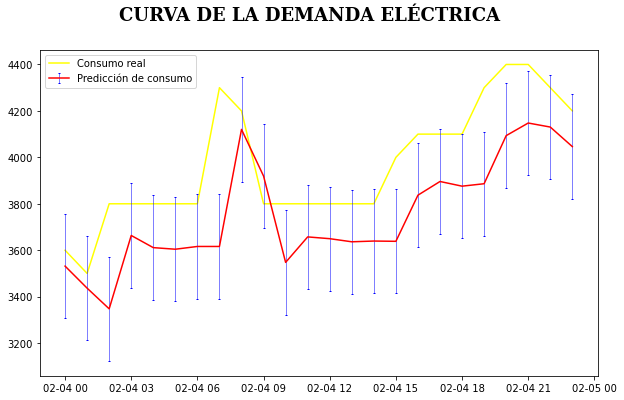

In [35]:
# Figura 5.17: Grafica de error entre curva de la demanda eléctrica real y pronosticada (Diaria)
x = dia_feb_test.index
y = dia_feb_test

x_pred = x
y_pred = dia_feb_pred

me =  (abs(y- y_pred)).mean(axis=0) #Error medio de la semana
print(me)
yerror = me
plt.figure(figsize=(10,6))
plt.plot(x, 
         y,
         color='yellow', 
         label='Consumo real')
plt.errorbar(x_pred,
         y_pred,
         yerr = yerror,
         ecolor = 'blue', 
         elinewidth = 0.5,
         capsize = 1,
         color='red', 
         label='Predicción de consumo')
plt.suptitle('CURVA DE LA DEMANDA ELÉCTRICA',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()
plt.show()


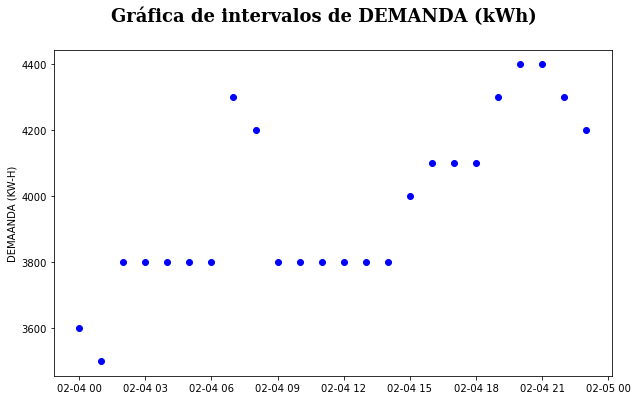

In [36]:
# Figura 5.18: Intervalos de la demanda de energía eléctrica (Datos reales y de pronóstico - 1dia)

plt.figure(figsize=(10,6))
plt.scatter(x,
            y, 
            color='blue', 
            label='Consumo real')

plt.suptitle('Gráfica de intervalos de DEMANDA (kWh)',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.ylabel('DEMAANDA (KW-H)')
# plt.legend()
plt.show()

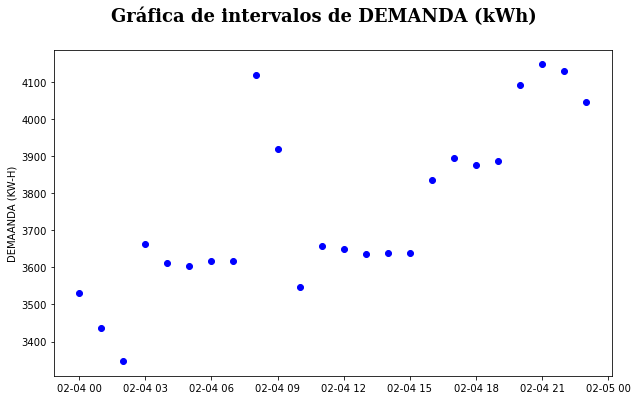

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(x_pred,
            y_pred, 
            color='blue', 
            label='Consumo pronosticado')

plt.suptitle('Gráfica de intervalos de DEMANDA (kWh)',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.ylabel('DEMAANDA (KW-H)')
# plt.legend()
plt.show()

# Análisis de hiperparámetros para entrenamientos

In [ ]:
#Grafica de valores
# Y_test #Aun no defnido 
# plt.plot(data_test.values[60:321], color='red', label='Consumo real')
# plt.plot(prediccion[:261], color='blue', label='Predicción de consumo')
# plt.xlabel('Tiempo')
# plt.ylabel('Consumo')
# plt.legend()
# plt.show()

## Algoritmo de optimización 

### ADAM

In [40]:
model_adam, history_adam= NN_LSTM(optimizador = 'adam', neuronas = 10, epocas = 10)
model_adam.save('modelos/model_adam.h5')


Epoch 1/10
35748/35748 [==============================] - 260s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0929
Epoch 2/10
35748/35748 [==============================] - 108s 3ms/step - loss: 0.0082 - mean_absolute_error: 0.0622
Epoch 3/10
35748/35748 [==============================] - 147s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0537
Epoch 4/10
35748/35748 [==============================] - 165s 5ms/step - loss: 0.0052 - mean_absolute_error: 0.0469
Epoch 5/10
35748/35748 [==============================] - 111s 3ms/step - loss: 0.0043 - mean_absolute_error: 0.0416
Epoch 6/10
35748/35748 [==============================] - 161s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0390
Epoch 7/10
35748/35748 [==============================] - 176s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0377
Epoch 8/10
35748/35748 [==============================] - 172s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0369
Epoch 9/10
35748/35748 [==============================] - 145s 4

In [45]:
prediccion_adam = predDataTest(model_adam)

### ADADELTA

In [41]:
model_adadelta, history_adadelta = NN_LSTM(optimizador = 'adadelta', neuronas = 10, epocas = 10)
model_adadelta.save('modelos/model_adadelta.h5')


Epoch 1/10
35748/35748 [==============================] - 150s 4ms/step - loss: 0.0214 - mean_absolute_error: 0.0948
Epoch 2/10
35748/35748 [==============================] - 122s 3ms/step - loss: 0.0082 - mean_absolute_error: 0.0624
Epoch 3/10
35748/35748 [==============================] - 136s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0548
Epoch 4/10
35748/35748 [==============================] - 161s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0491
Epoch 5/10
35748/35748 [==============================] - 142s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0452
Epoch 6/10
35748/35748 [==============================] - 159s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0427
Epoch 7/10
35748/35748 [==============================] - 121s 3ms/step - loss: 0.0040 - mean_absolute_error: 0.0405
Epoch 8/10
35748/35748 [==============================] - 156s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0389
Epoch 9/10
35748/35748 [==============================] - 153s 4

In [46]:
prediccion_adadelta = predDataTest(model_adadelta)

### RMSPROP

In [42]:
model_rmsprop, history_rmsprop = NN_LSTM(optimizador = 'rmsprop', neuronas = 10, epocas = 10)
model_rmsprop.save('modelos/model_rmsprop.h5')


Epoch 1/10
35748/35748 [==============================] - 110s 3ms/step - loss: 0.0099 - mean_absolute_error: 0.0689
Epoch 2/10
35748/35748 [==============================] - 162s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0528
Epoch 3/10
35748/35748 [==============================] - 153s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0437
Epoch 4/10
35748/35748 [==============================] - 159s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0404
Epoch 5/10
35748/35748 [==============================] - 139s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0384
Epoch 6/10
35748/35748 [==============================] - 137s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0371
Epoch 7/10
35748/35748 [==============================] - 160s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0363
Epoch 8/10
35748/35748 [==============================] - 129s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0353
Epoch 9/10
35748/35748 [==============================] - 126s 4

In [47]:
prediccion_rmsprop = predDataTest(model_rmsprop)

### Gráfica Comparación Optimizadores

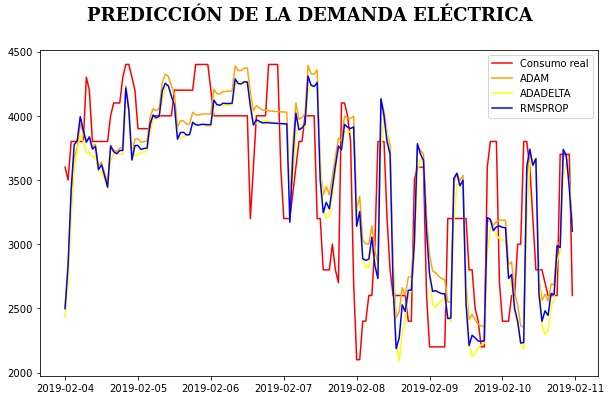

In [51]:
#Figura 5.42: Resultados variación algoritmo de entrenamiento de la red neuronal

plt.figure(figsize=(10,6))

limite = len(semana_estudio_test)
plt.plot(semana_estudio_test, 
         color='red', 
         label='Consumo real')
plt.plot(semana_estudio_test.index,
         prediccion_adam[:limite], 
         color='orange', 
         label='ADAM')
plt.plot(semana_estudio_test.index,
         prediccion_adadelta[:limite], 
         color='yellow', 
         label='ADADELTA')
plt.plot(semana_estudio_test.index,
         prediccion_rmsprop[:limite], 
         color='blue', 
         label='RMSPROP')

plt.suptitle('PREDICCIÓN DE LA DEMANDA ELÉCTRICA',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()
plt.show()

## Número de neuronas

### 1 Neurona

In [52]:
model_unaN, history_unaN = NN_LSTM(optimizador = 'rmsprop', neuronas = 1, epocas = 10)
model_unaN.save('modelos/model_unaN.h5')


Epoch 1/10
35748/35748 [==============================] - 265s 7ms/step - loss: 0.1432 - mean_absolute_error: 0.3001
Epoch 2/10
35748/35748 [==============================] - 320s 9ms/step - loss: 0.0245 - mean_absolute_error: 0.1204
Epoch 3/10
35748/35748 [==============================] - 355s 10ms/step - loss: 0.0138 - mean_absolute_error: 0.0918
Epoch 4/10
35748/35748 [==============================] - 936s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0782
Epoch 5/10
35748/35748 [==============================] - 893s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0719
Epoch 6/10
35748/35748 [==============================] - 193s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0691
Epoch 7/10
35748/35748 [==============================] - 271s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0674
Epoch 8/10
35748/35748 [==============================] - 149s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0653
Epoch 9/10
35748/35748 [==============================] - 862

In [31]:
# model_unaN = keras.models.load_model('modelos/model_unaN.h5')
# model_unaN.summary()
prediccion_unaN = predDataTest(model_unaN)

### 3 Neurona

In [53]:
model_tresN, history_tresN = NN_LSTM(optimizador = 'rmsprop', neuronas = 3, epocas = 10)
model_tresN.save('modelos/model_tresN.h5')

Epoch 1/10
35748/35748 [==============================] - 94s 3ms/step - loss: 0.0257 - mean_absolute_error: 0.1082
Epoch 2/10
35748/35748 [==============================] - 111s 3ms/step - loss: 0.0076 - mean_absolute_error: 0.0602
Epoch 3/10
35748/35748 [==============================] - 120s 3ms/step - loss: 0.0064 - mean_absolute_error: 0.0542
Epoch 4/10
35748/35748 [==============================] - 5429s 152ms/step - loss: 0.0057 - mean_absolute_error: 0.0506
Epoch 5/10
35748/35748 [==============================] - 7536s 211ms/step - loss: 0.0053 - mean_absolute_error: 0.0482
Epoch 6/10
35748/35748 [==============================] - 389s 11ms/step - loss: 0.0051 - mean_absolute_error: 0.0469
Epoch 7/10
35748/35748 [==============================] - 275s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0457
Epoch 8/10
35748/35748 [==============================] - 336s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0448
Epoch 9/10
35748/35748 [==============================] - 

In [33]:
# model_tresN = keras.models.load_model('modelos/model_tresN.h5')
# model_tresN.summary()
prediccion_tresN = predDataTest(model_tresN)

### 5 Neuronas

In [22]:
model_cincoN, history_cincoN = NN_LSTM(optimizador = 'rmsprop', neuronas = 5, epocas = 10)
model_cincoN.save('modelos/model_cincoN.h5')

2022-01-23 09:58:05.583999: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-23 09:58:05.584934: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/10
35748/35748 [==============================] - 138s 4ms/step - loss: 0.0244 - mean_absolute_error: 0.0989
Epoch 2/10
35748/35748 [==============================] - 157s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0538
Epoch 3/10
35748/35748 [==============================] - 181s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0461
Epoch 4/10
35748/35748 [==============================] - 177s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0422
Epoch 5/10
35748/35748 [==============================] - 180s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0405
Epoch 6/10
35748/35748 [==============================] - 170s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0395
Epoch 7/10
35748/35748 [==============================] - 161s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0391
Epoch 8/10
35748/35748 [==============================] - 176s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0385
Epoch 9/10
35748/35748 [==============================] - 164s 5

In [34]:
model_cincoN = keras.models.load_model('modelos/model_cincoN.h5')
# model_cincoN.summary()
prediccion_cincoN = predDataTest(model_cincoN)

### 10 Neuronas

In [24]:
model_diezN, history_diezN = NN_LSTM(optimizador = 'rmsprop', neuronas = 10, epocas = 10)
model_diezN.save('modelos/model_diezN.h5')

Epoch 1/10
35748/35748 [==============================] - 106s 3ms/step - loss: 0.0180 - mean_absolute_error: 0.0861
Epoch 2/10
35748/35748 [==============================] - 151s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0552
Epoch 3/10
35748/35748 [==============================] - 152s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0453
Epoch 4/10
35748/35748 [==============================] - 147s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0407
Epoch 5/10
35748/35748 [==============================] - 145s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0383
Epoch 6/10
35748/35748 [==============================] - 150s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0368
Epoch 7/10
35748/35748 [==============================] - 166s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0365
Epoch 8/10
35748/35748 [==============================] - 143s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0358
Epoch 9/10
35748/35748 [==============================] - 140s 4

In [35]:
model_diezN = keras.models.load_model('modelos/model_diezN.h5')
# model_diezN.summary()
prediccion_diezN = predDataTest(model_diezN)

### 15 Neuronas

In [23]:
model_quinceN, history_quinceN = NN_LSTM(optimizador = 'rmsprop', neuronas = 15, epocas = 10)
model_quinceN.save('modelos/model_quinceN.h5')

Epoch 1/10
35748/35748 [==============================] - 148s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0673
Epoch 2/10
35748/35748 [==============================] - 151s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0503
Epoch 3/10
35748/35748 [==============================] - 160s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0424
Epoch 4/10
35748/35748 [==============================] - 155s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0391
Epoch 5/10
35748/35748 [==============================] - 171s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0376
Epoch 6/10
35748/35748 [==============================] - 201s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0363
Epoch 7/10
35748/35748 [==============================] - 131s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0356
Epoch 8/10
35748/35748 [==============================] - 159s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0350
Epoch 9/10
35748/35748 [==============================] - 161s 4

In [36]:
model_quinceN = keras.models.load_model('modelos/model_quinceN.h5')
# model_quinceN.summary()
prediccion_quinceN = predDataTest(model_quinceN)

### Gráfica Comparación Neuronas

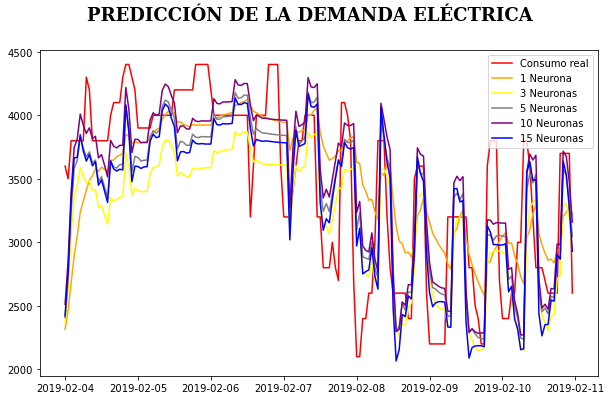

In [60]:
# Figura 5.43: Resultados variación número de neuronas

plt.figure(figsize=(10,6))

limite = len(semana_estudio_test)
plt.plot(semana_estudio_test, 
         color='red', 
         label='Consumo real')
plt.plot(semana_estudio_test.index,
         prediccion_unaN[:limite], 
         color='orange', 
         label='1 Neurona')
plt.plot(semana_estudio_test.index,
         prediccion_tresN[:limite], 
         color='yellow', 
         label='3 Neuronas')
plt.plot(semana_estudio_test.index,
         prediccion_cincoN[:limite], 
         color='gray', 
         label='5 Neuronas')
plt.plot(semana_estudio_test.index,
         prediccion_diezN[:limite], 
         color='purple', 
         label='10 Neuronas')
plt.plot(semana_estudio_test.index,
         prediccion_quinceN[:limite], 
         color='blue', 
         label='15 Neuronas')

plt.suptitle('PREDICCIÓN DE LA DEMANDA ELÉCTRICA',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()
plt.show()

## Número de épocas

###  3 épocas

In [25]:
model_tresE, history_quinceN = NN_LSTM(optimizador = 'rmsprop', neuronas = 15, epocas = 3)
model_tresE.save('modelos/model_tresE.h5')

Epoch 1/3
35748/35748 [==============================] - 136s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0738
Epoch 2/3
35748/35748 [==============================] - 168s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0484
Epoch 3/3
35748/35748 [==============================] - 167s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0402


In [61]:
model_tresE = keras.models.load_model('modelos/model_tresE.h5')
# model_quinceN.summary()
prediccion_tresE = predDataTest(model_tresE)

### 5 épocas

In [26]:
model_cincoE, history_quinceN = NN_LSTM(optimizador = 'rmsprop', neuronas = 15, epocas = 5)
model_cincoE.save('modelos/model_cincoE.h5')

Epoch 1/5
35748/35748 [==============================] - 128s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0756
Epoch 2/5
35748/35748 [==============================] - 167s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0531
Epoch 3/5
35748/35748 [==============================] - 175s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0435
Epoch 4/5
35748/35748 [==============================] - 168s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0390
Epoch 5/5
35748/35748 [==============================] - 169s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0368


In [62]:
model_cincoE = keras.models.load_model('modelos/model_cincoE.h5')
# model_cincoE.summary()
prediccion_cincoE = predDataTest(model_cincoE)

### 10 épocas

In [66]:
model_diezE, history_diezN = NN_LSTM(optimizador = 'rmsprop', neuronas = 15, epocas = 10)
model_diezE.save('modelos/model_diezE.h5')

Epoch 1/10
35748/35748 [==============================] - 97s 3ms/step - loss: 0.0162 - mean_absolute_error: 0.0808
Epoch 2/10
35748/35748 [==============================] - 177s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0530
Epoch 3/10
35748/35748 [==============================] - 169s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0440
Epoch 4/10
35748/35748 [==============================] - 202s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0397
Epoch 5/10
35748/35748 [==============================] - 203s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0373
Epoch 6/10
35748/35748 [==============================] - 196s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0359
Epoch 7/10
35748/35748 [==============================] - 170s 5ms/step - loss: 0.0032 - mean_absolute_error: 0.0348
Epoch 8/10
35748/35748 [==============================] - 175s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0338
Epoch 9/10
35748/35748 [==============================] - 183s 5m

In [67]:
model_diezE = keras.models.load_model('modelos/model_diezE.h5')
# model_diezE.summary()
prediccion_diezE = predDataTest(model_diezE)

### 15 épocas

In [27]:
model_quinceE, history_quinceN = NN_LSTM(optimizador = 'rmsprop', neuronas = 15, epocas = 15)
model_quinceE.save('modelos/model_quinceE.h5')

Epoch 1/15
35748/35748 [==============================] - 140s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0791
Epoch 2/15
35748/35748 [==============================] - 162s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0521
Epoch 3/15
35748/35748 [==============================] - 146s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0433
Epoch 4/15
35748/35748 [==============================] - 147s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0390
Epoch 5/15
35748/35748 [==============================] - 163s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0372
Epoch 6/15
35748/35748 [==============================] - 155s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0359
Epoch 7/15
35748/35748 [==============================] - 149s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0349
Epoch 8/15
35748/35748 [==============================] - 152s 4ms/step - loss: 0.0031 - mean_absolute_error: 0.0341
Epoch 9/15
35748/35748 [==============================] - 155s 4

In [63]:
model_quinceE = keras.models.load_model('modelos/model_quinceE.h5')
# model_quinceE.summary()
prediccion_quinceE = predDataTest(model_quinceE)

### Gráfica comparación épocas

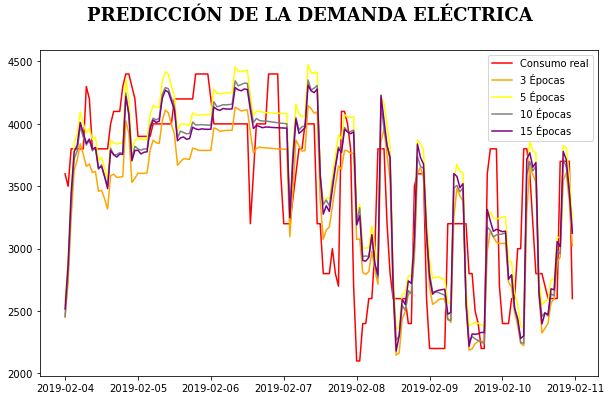

In [68]:
#Figura 5.44: Resultados variación número de epocas

plt.figure(figsize=(10,6))

limite = len(semana_estudio_test)
plt.plot(semana_estudio_test, 
         color='red', 
         label='Consumo real')
plt.plot(semana_estudio_test.index,
         prediccion_tresE[:limite], 
         color='orange', 
         label='3 Épocas')
plt.plot(semana_estudio_test.index,
         prediccion_cincoE[:limite], 
         color='yellow', 
         label='5 Épocas')
plt.plot(semana_estudio_test.index,
         prediccion_diezE[:limite], 
         color='gray', 
         label='10 Épocas')
plt.plot(semana_estudio_test.index,
         prediccion_quinceE[:limite], 
         color='purple', 
         label='15 Épocas')


plt.suptitle('PREDICCIÓN DE LA DEMANDA ELÉCTRICA',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.legend()
plt.show()